In [3]:
# pip install glob2

In [1]:
import os
import glob
import cv2

In [4]:
path = "E:\\Img_datasets\\Chess_Pieces"

img_path = glob.glob(path+"\\**\\*.jpg")
print(img_path)

['E:\\Img_datasets\\Chess_Pieces\\bishop\\00000000_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000002_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000003_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000004_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000005_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000006_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000008_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000009_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000010_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000013_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000014_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000015_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000016_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000017_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000018_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop

In [8]:
r1 = os.path.split('E:\\Img_datasets\\Chess_Pieces\\queen\\00000060_resized.jpg')
print(r1)
print(r1[0])
r2 = os.path.split(r1[0])
print(r2)
print(r2[1])

('E:\\Img_datasets\\Chess_Pieces\\queen', '00000060_resized.jpg')
E:\Img_datasets\Chess_Pieces\queen
('E:\\Img_datasets\\Chess_Pieces', 'queen')
queen


In [47]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],img_path))
print(labels)

['bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop',

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.DataFrame({'File_path':img_path,'CP_Name':labels})
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,File_path,CP_Name
0,E:\Img_datasets\Chess_Pieces\pawn\00000038_res...,pawn
1,E:\Img_datasets\Chess_Pieces\bishop\00000169_r...,bishop
2,E:\Img_datasets\Chess_Pieces\bishop\00000069_r...,bishop
3,E:\Img_datasets\Chess_Pieces\knight\00000247_r...,knight
4,E:\Img_datasets\Chess_Pieces\knight\00000076_r...,knight


In [50]:
df['CP_Name'].value_counts()

knight    174
bishop    141
rook      139
queen     115
pawn       82
Name: CP_Name, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2

In [52]:
df.columns

df['File_path']
# df.File_path

Index(['File_path', 'CP_Name'], dtype='object')

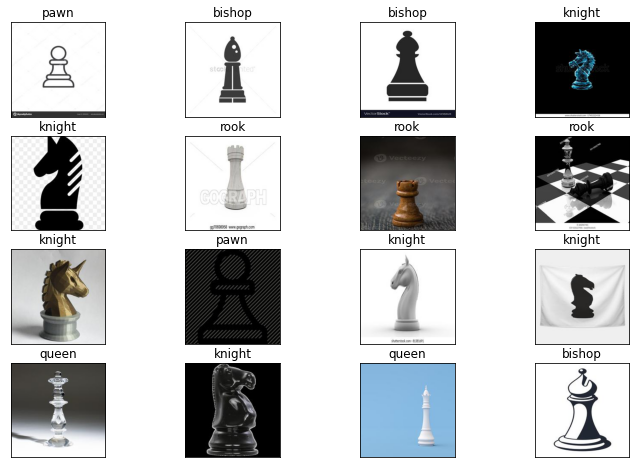

In [53]:
fig, axes = plt.subplots(4,4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.File_path[i]))
    ax.set_title(df.CP_Name[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [33]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

<class 'PIL.JpegImagePlugin.JpegImageFile'>


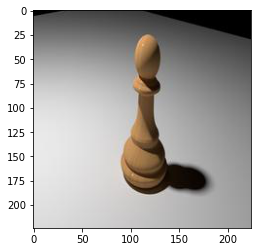

In [54]:
print(type(load_img(df['File_path'][35])))
plt.imshow(load_img(df['File_path'][35]))      
plt.show()  

In [57]:
print(img_to_array(load_img(df['File_path'][35])).shape)

(224, 224, 3)


In [58]:
image_list =[]
labels =[]
for idx, row in df.iterrows():
    path = row['File_path']
    category = row['CP_Name']
    imgs = img_to_array(load_img(path))   
    image_list.append(imgs)
    labels.append(category)

In [61]:
print(len(image_list))
print(len(labels))

651
651


In [69]:
labels[:5]

y_new = pd.Series(labels)
y_new[:4]

0      pawn
1    bishop
2    bishop
3    knight
dtype: object

In [71]:
lb = LabelEncoder()
y1 = lb.fit_transform(y_new)

In [72]:
y1[:5]

array([2, 0, 0, 1, 1])

In [62]:
x = np.array(image_list)
y = np.array(labels) 
print(x.shape)
print(y.shape)

(651, 224, 224, 3)
(651,)


In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(520, 224, 224, 3)
(131, 224, 224, 3)
(520,)
(131,)


In [75]:
y1[:10]

array([2, 0, 0, 1, 1, 4, 4, 4, 1, 2])

### Model Architecture

In [76]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
m1 = Sequential()
m1.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3)))
m1.add(MaxPooling2D(pool_size=(2, 2)))
# m1.add(Dropout(0.2))

m1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
# m1.add(Dropout(0.2))

m1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
# m1.add(Dropout(0.2))

m1.add(Flatten())
m1.add(Dense(128, activation='relu'))
m1.add(Dense(64, activation='relu'))

m1.add(Dense(5, activation='softmax'))

m1.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [78]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
14/17 [=======================>......] - ETA: 30s - loss: 92.4580 - accuracy: 0.2165

KeyboardInterrupt: 